In [1]:
import pandas as pd

In [215]:
#read in csv as data frame
jarchie_df=pd.read_csv('data/barchie2.csv')  

In [216]:
import matplotlib.pyplot as plt
import re
import spacy
nlp=spacy.load('en_core_web_lg')
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer

In [217]:
#write sentences from tweets into list
list_of_sentences = [sentence for sentence in jarchie_df.tweets]

#create set of words from all tweets
lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [218]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [219]:
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [220]:
stem2= []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [221]:
df2 = pd.DataFrame(stem2)

df2 = df2[0].value_counts()

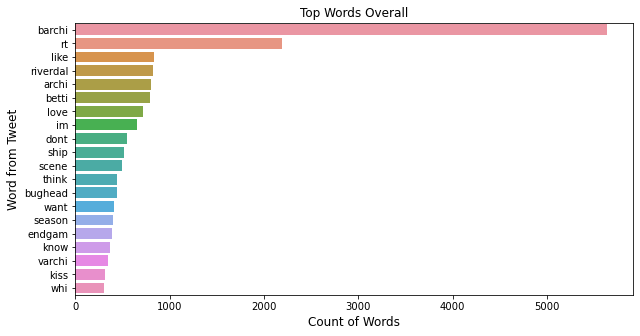

In [222]:
df2 = df2[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df2.values,df2.index, alpha=1)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.savefig('barchie2.png')